# Лабораторна робота №3

Спершу змоделюємо 1000 симуляцій 40 експоненціальних розподілів.

In [113]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


lambda_param = 0.2
n = 40
simulations = 1000

samples = np.random.exponential(scale=1/lambda_param, size=(simulations, n))


1. Тепер знайдемо середнє значення вибірки та порівняємо його з теоретичним середнім значенням розподілу;

Sample Mean: 5.0038, Theoretical Mean: 5.0000


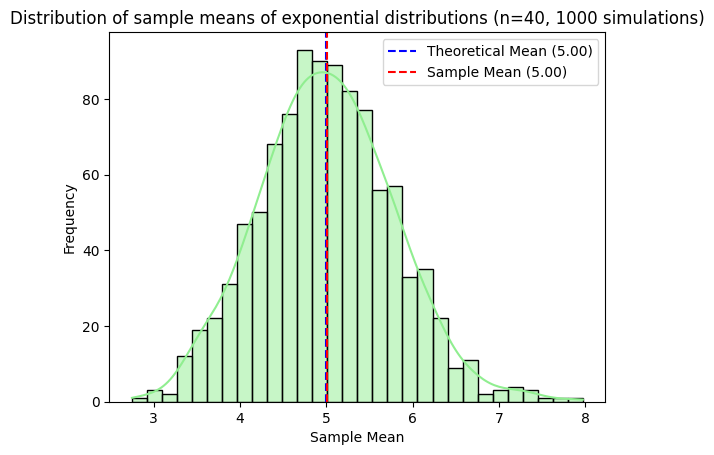

In [114]:
means = samples.mean(axis=1)

sample_mean = np.mean(means)
theoretical_mean = 1 / lambda_param

print(f"Sample Mean: {sample_mean:.4f}, Theoretical Mean: {theoretical_mean:.4f}")


sns.histplot(means, kde=True, bins=30, color='lightgreen')
plt.axvline(theoretical_mean, color='blue', linestyle='dashed', label=f'Theoretical Mean ({theoretical_mean:.2f})')
plt.axvline(sample_mean, color='red', linestyle='dashed', label=f'Sample Mean ({sample_mean:.2f})')
plt.xlabel("Sample Mean")
plt.ylabel("Frequency")
plt.title("Distribution of sample means of exponential distributions (n=40, 1000 simulations)")
plt.legend()
plt.show()



Центральна гранична теорема говорить про те, що якщо взяти достатньо велику кількість вибірок певного розподілу (в нашому випадку експоненційного) і обчислити їхні середні, то розподіл цих середніх буде наближатися до нормального з математичним сподіванням, рівним теоретичному. Це явище ми і можемо спостерігати на графіку вище. Форма отриманого розподілу візуально подібна до нормального розподілу, а середнє значення наближається до теоретичного очікуваного значення (E(X) = 1/lambda). Різниця =0.0038 пояснюється випадковими коливаннями вибірки. Чим більше симуляцій ми проводимо, тим ближче середнє значення вибірки буде до теоретичного.

2. Покажемо, наскільки мінливою є вибірка (через дисперсію) і порівняємо її з теоретичною дисперсією розподілу

Sample Variance: 0.6101, Theoretical Variance: 0.6250
Sample std: 0.7811, Theoretical std: 0.7906


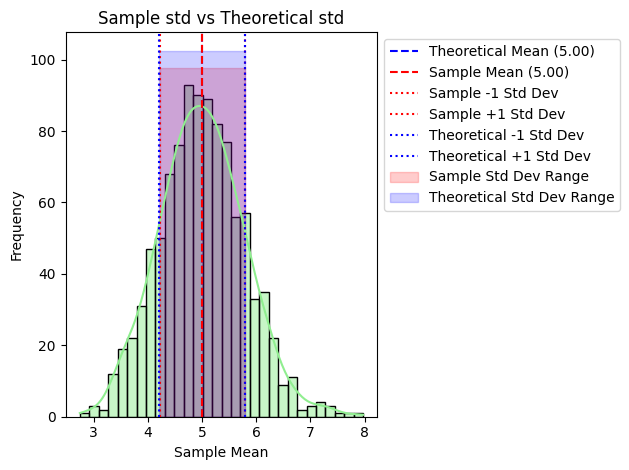

In [115]:
sample_variance = np.var(means)
theoretical_variance = (1 / lambda_param) ** 2 / n
sample_std = np.sqrt(sample_variance)
theoretical_std = np.sqrt(theoretical_variance)

print(f"Sample Variance: {sample_variance:.4f}, Theoretical Variance: {theoretical_variance:.4f}")
print(f"Sample std: {sample_std:.4f}, Theoretical std: {theoretical_std:.4f}")


sns.histplot(means, kde=True, bins=30, color='lightgreen')
plt.axvline(theoretical_mean, color='blue', linestyle='dashed', label=f'Theoretical Mean ({theoretical_mean:.2f})')
plt.axvline(sample_mean, color='red', linestyle='dashed', label=f'Sample Mean ({sample_mean:.2f})')

plt.axvline(sample_mean - sample_std, color='red', linestyle='dotted', label='Sample -1 Std Dev')
plt.axvline(sample_mean + sample_std, color='red', linestyle='dotted', label='Sample +1 Std Dev')
plt.axvline(theoretical_mean - theoretical_std, color='blue', linestyle='dotted', label='Theoretical -1 Std Dev')
plt.axvline(theoretical_mean + theoretical_std, color='blue', linestyle='dotted', label='Theoretical +1 Std Dev')

plt.fill_betweenx([0, plt.gca().get_ylim()[1]], 
                  sample_mean - sample_std, sample_mean + sample_std, 
                  color='red', alpha=0.2, label='Sample Std Dev Range')

plt.fill_betweenx([0, plt.gca().get_ylim()[1]], 
                  theoretical_mean - theoretical_std, theoretical_mean + theoretical_std, 
                  color='blue', alpha=0.2, label='Theoretical Std Dev Range')

plt.xlabel("Sample Mean")
plt.ylabel("Frequency")
plt.title("Sample std vs Theoretical std")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

Проведений вище експеримент показав, що дисперсія вибірки збігається до теоретичної дисперсії. Це узгоджується з центральною граничною теоремою, яка стверджує, що при збільшенні кількості вибірок вибіркова дисперсія прямує до теоретичної.

3. Покажемо, що розподіл наближено є нормальним.

Для цього побудуємо графіки для великої колекції випадкових експоненціальних розподілів і великої колекції середніх 40 експоненціальних розподілів. А також зобразимо PDF нормального розмоділу з параметром μ=1/λ та σ рівним значенню теоретичного стандртного відхилення, обчисленого на попередньому кроці.

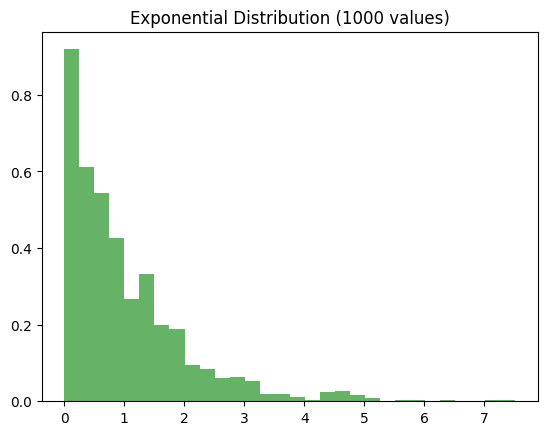

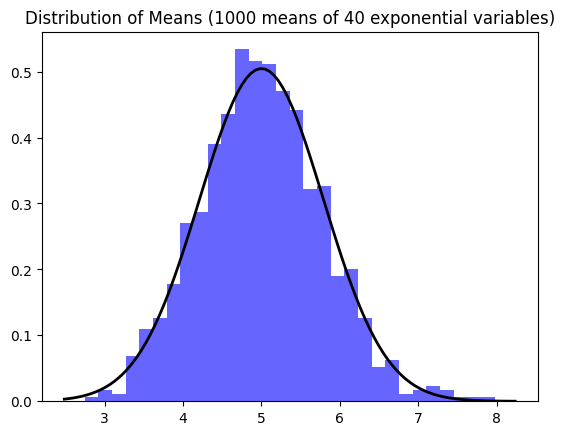

In [122]:
from scipy.stats import norm, kstest, chi2_contingency

exp_data = np.random.exponential(scale=1, size=1000)
plt.hist(exp_data, bins=30, density=True, alpha=0.6, color='g')
plt.title('Exponential Distribution (1000 values)')
plt.show()

plt.hist(means, bins=30, density=True, alpha=0.6, color='b')
plt.title('Distribution of Means (1000 means of 40 exponential variables)')


xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, theoretical_mean, theoretical_std)
plt.plot(x, p, 'k', linewidth=2)

plt.show()


Як бачимо, графік достатньо великої колекції середніх 40 експоненціальних розподілів візуально відповідає нормальному розподілу, що підтверджує CLT. 

Додатково щоб перевірити теорію про відповідність даної вибірки нормальному розподілу використаємо λ - критерій і χ² тест для рівня значущості 0.05

In [129]:
def distr_tests(data):
    def decision(p):
        if p > 0.05:
            print("✅ Дані відповідають нормальному розподілу")
        else:
            print("❌ Дані відрізняються від нормального розподілу")

    ks_stat, ks_p = kstest(data, 'norm', args=(theoretical_mean, theoretical_std))
    print(f"Kolmogorov-Smirnov test:\nStatistic = {ks_stat:.4f}, p-value = {ks_p:.4f}")
    decision(ks_p)


    hist, bin_edges = np.histogram(data, bins=10, density=True)
    expected_freq = norm.pdf(bin_edges[:-1], theoretical_mean, theoretical_std) * np.diff(bin_edges) * len(means)
    chi2_stat, chi2_p = chi2_contingency([hist, expected_freq])[:2]
    print(f"Chi-Square test:\nStatistic = {chi2_stat:.4f}, p-value = {chi2_p:.4f}")
    decision(ks_p)

print("Відповідність великої колекції випадкових експоненціальних розподілів нормальному розподілу: ")
distr_tests(exp_data)

print("\nВідповідність великої колекції середніх 40 експоненціальних розподілів нормальному розподілу: ")
distr_tests(means)


Відповідність великої колекції випадкових експоненціальних розподілів нормальному розподілу: 
Kolmogorov-Smirnov test:
Statistic = 0.9504, p-value = 0.0000
❌ Дані відрізняються від нормального розподілу
Chi-Square test:
Statistic = 885.1738, p-value = 0.0000
❌ Дані відрізняються від нормального розподілу

Відповідність великої колекції середніх 40 експоненціальних розподілів нормальному розподілу: 
Kolmogorov-Smirnov test:
Statistic = 0.0150, p-value = 0.9761
✅ Дані відповідають нормальному розподілу
Chi-Square test:
Statistic = 0.2420, p-value = 1.0000
✅ Дані відповідають нормальному розподілу


Таким чином, можемо спостерігати, що для `достатньо великої колекції середніх 40 експоненціальних розподілів` обидва тести підтвердили гіпотезу і показали, що даний розподіл відповідає нормальному. χ²-тест дав p-value = 0.9761, а χ²-тест — 1.0, що означає відсутність статистично значущих відмінностей від нормального розподілу та знову підтверджує центральну граничну теорему.